In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
df1 = pd.read_csv("devclub.csv")
df1.columns

Index(['EMPID', 'PASSPORT', 'FIRSTNAME', 'LASTNAME', 'GENDER', 'BIRTHDAY',
       'NATIONALITY', 'HIRED', 'DEPT', 'POSITION', 'STATUS', 'REGION'],
      dtype='object')

In [3]:
df1['GENDER'] = df1['GENDER'].apply(lambda x: "Male" if x == 0 else "Female")
df1['AGE'] = df1['BIRTHDAY'].apply(lambda x: (dt.now() - dt(int(x.split("-")[2]), int(x.split("-")[1]), int(x.split("-")[0]))).days / 365)
df1['HIRED_YEAR'] = df1['HIRED'].apply(lambda x: int(x.split("-")[2]))
df1

,EMPID,PASSPORT,FIRSTNAME,LASTNAME,GENDER,BIRTHDAY,NATIONALITY,HIRED,DEPT,POSITION,STATUS,REGION,AGE,HIRED_YEAR
0,3,JUI65YBK7AF,Jada,Bender,Male,28-05-1963,Pakistan,11-02-2001,Pilot,Pilot,1,Canada,59.408219,2001
1,5,AZE20CSG4MU,Lillian,Reese,Male,03-12-1982,Ukraine,19-05-2002,Flight Planning,Steward,1,Canada,39.876712,2002
2,23,NFH65BYM0VB,Armand,Horn,Male,24-05-1987,Netherlands,19-06-2007,Aircraft Maintenance,Airhostess,1,Ocenia,35.402740,2007
3,29,CMK62UAD3VK,Rowan,Leonard,Female,15-07-1974,Germany,27-03-2004,Aircraft Maintenance,Pilot,1,Ocenia,48.268493,2004
4,33,EWD45RJW5YK,Carter,Velasquez,Male,23-11-1967,Indonesia,27-02-2005,Flight Planning,Pilot,1,APAC,54.915068,2005
5,34,BFS82MEY3CX,Selma,Bush,Male,26-03-1972,Italy,10-10-2008,Flight Attendance,Airhostess,1,USA,50.572603,2008
6,50,MRC33GHJ2KW,Calvin,Roach,Female,16-04-1999,Mexico,18-03-2011,Flight Attendance,Steward,1,Europe,23.498630,2011
7,66,WKV12UQC6QF,Zachery,Valentine,Male,04-06-1971,Philippines,25-08-2011,Flight Attendance,Steward,1,Middle East,51.383562,2011
8,80,EUC74ENE9ZK,Ryan,Rush,Male,13-06-1998,Italy,31-07-2019,Aircraft Maintenance,Pilot,1,Middle East,24.339726,2019
9,93,UXL43IOW6OV,Honorato,Maxwell,Female,09-03-1982,France,04-02-2017,Aircraft Maintenance,Airhostess,1,Europe,40.613699,2017


<AxesSubplot: ylabel='EMPID'>

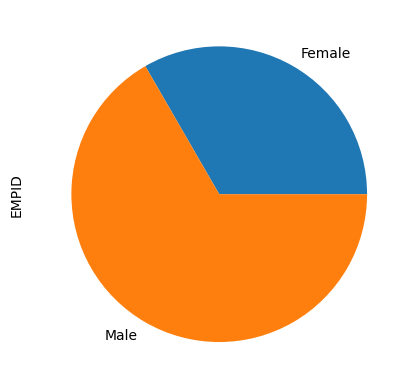

In [4]:
df2 = df1[['GENDER', 'EMPID']]
df2.groupby(['GENDER'])['EMPID'].count().plot.pie()

<AxesSubplot: xlabel='People', ylabel='DEPT,GENDER'>

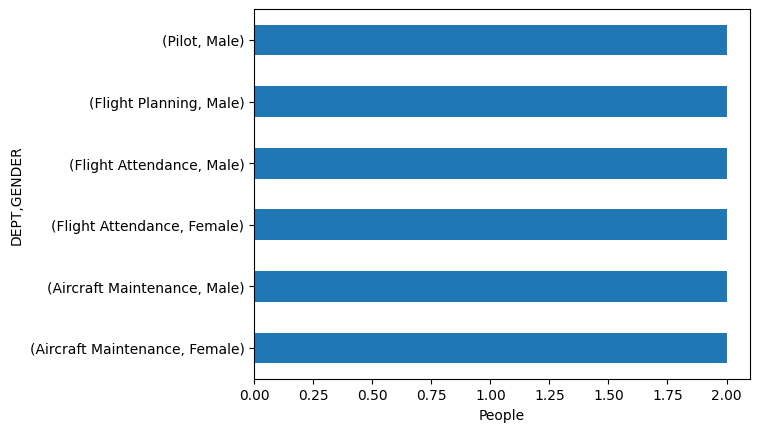

In [5]:
df3 = df1[['DEPT','GENDER', 'EMPID']]
df3.groupby(['DEPT', 'GENDER'])['EMPID'].count().plot.barh(xlabel='People')

<AxesSubplot: xlabel='DEPT', ylabel='AGE'>

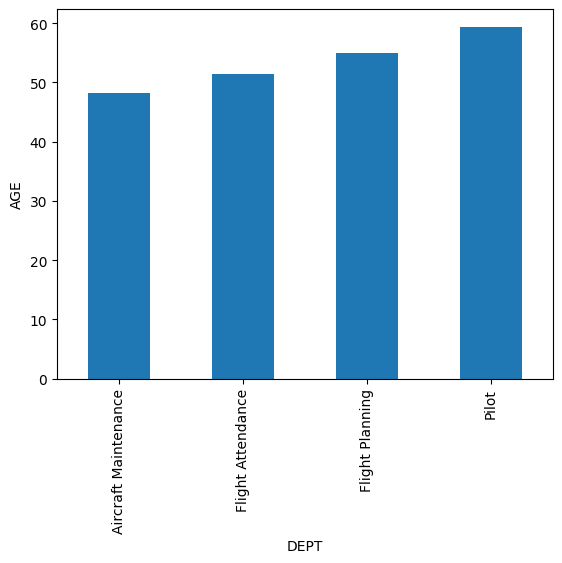

In [6]:
df4 = df1[['DEPT','AGE']]
df4.groupby(['DEPT'])['AGE'].max().plot.bar(ylabel='AGE')

<AxesSubplot: xlabel='HIRED_YEAR', ylabel='People'>

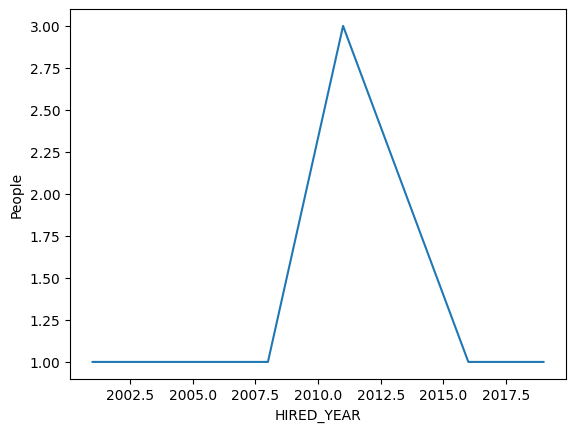

In [7]:
df4 = df1[['HIRED_YEAR','EMPID']]
df4.groupby(['HIRED_YEAR'])['EMPID'].count().plot.line(ylabel='People')

<AxesSubplot: xlabel='REGION', ylabel='People'>

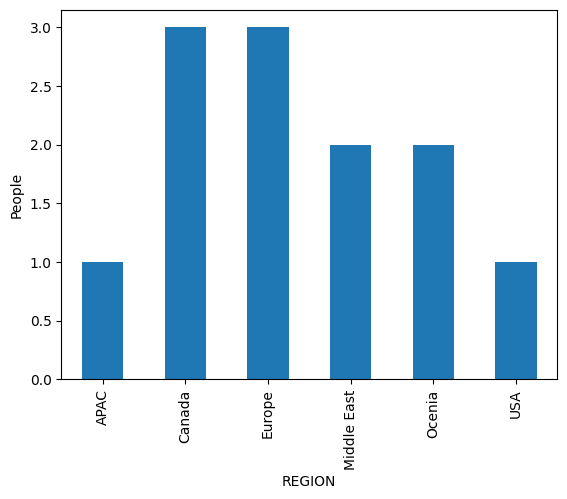

In [8]:
df4 = df1[['REGION','EMPID']]
df4.groupby(['REGION'])['EMPID'].count().plot.bar(ylabel='People')

<AxesSubplot: xlabel='NATIONALITY', ylabel='People'>

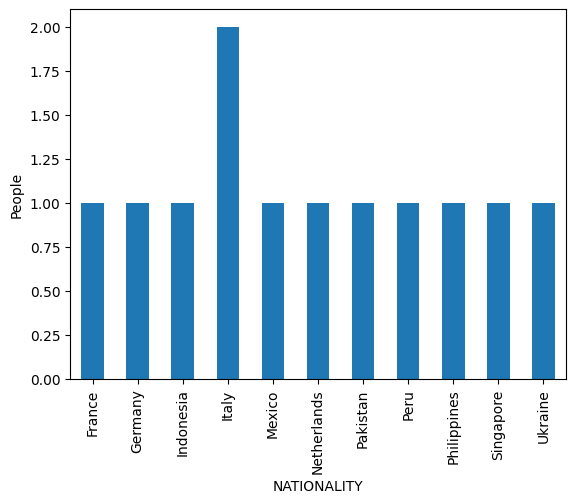

In [9]:
df5 = df1[['NATIONALITY','EMPID']]
df5.groupby(['NATIONALITY'])['EMPID'].count().plot.bar(ylabel='People')

In [10]:
df1['M'] = df1['GENDER'].apply(lambda x: 1 if x == 'Male' else 0)
df1['F'] = df1['GENDER'].apply(lambda x: 1 if x == 'Female' else 0)
# Prevent Warning
df6 = df1[['DEPT','M','F']]
gp6 = df6.groupby(['DEPT'])['M','F'].sum()
gp6 = gp6.reset_index()

C:\Users\yingyosr\cygwin64\tmp\ipykernel_13824\3594187151.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gp6 = df6.groupby(['DEPT'])['M','F'].sum()


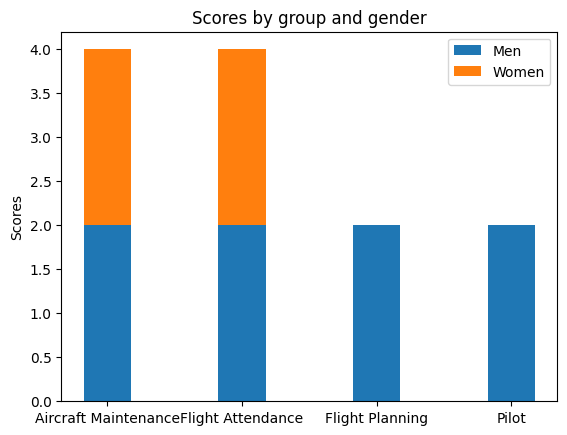

In [11]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
fig, ax = plt.subplots()
ax.bar(gp6['DEPT'].values, gp6['M'].values, 0.35, label='Men')
ax.bar(gp6['DEPT'].values, gp6['F'].values, 0.35, bottom=gp6['M'].values, label='Women')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()
plt.show()